   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

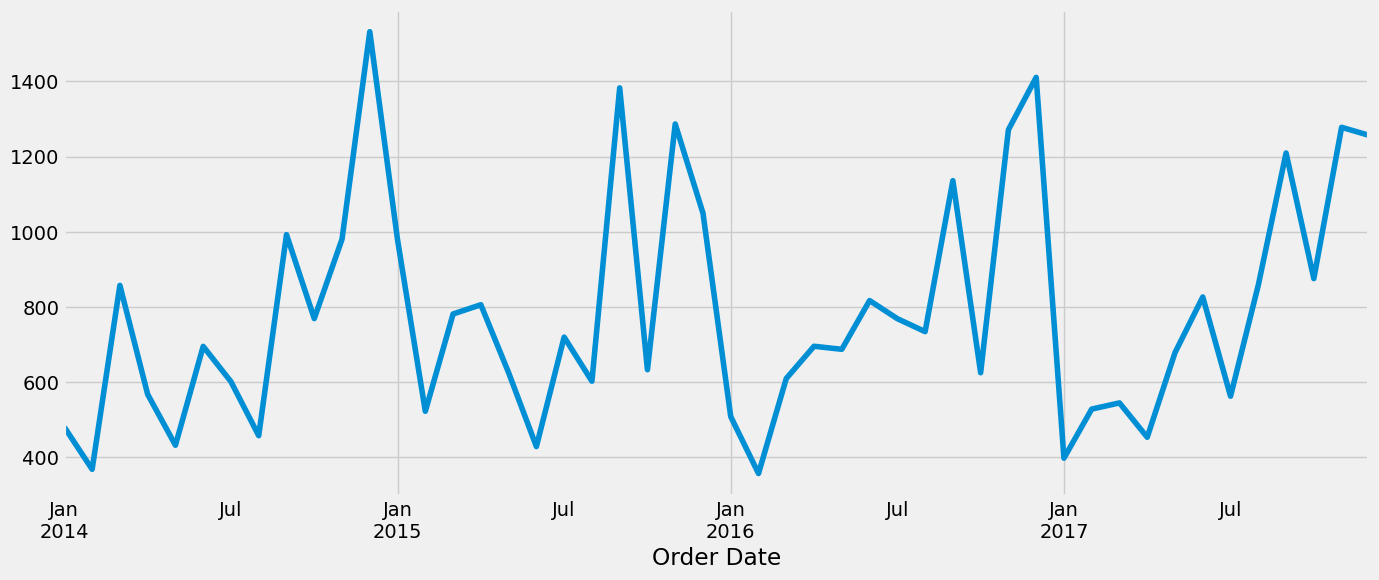

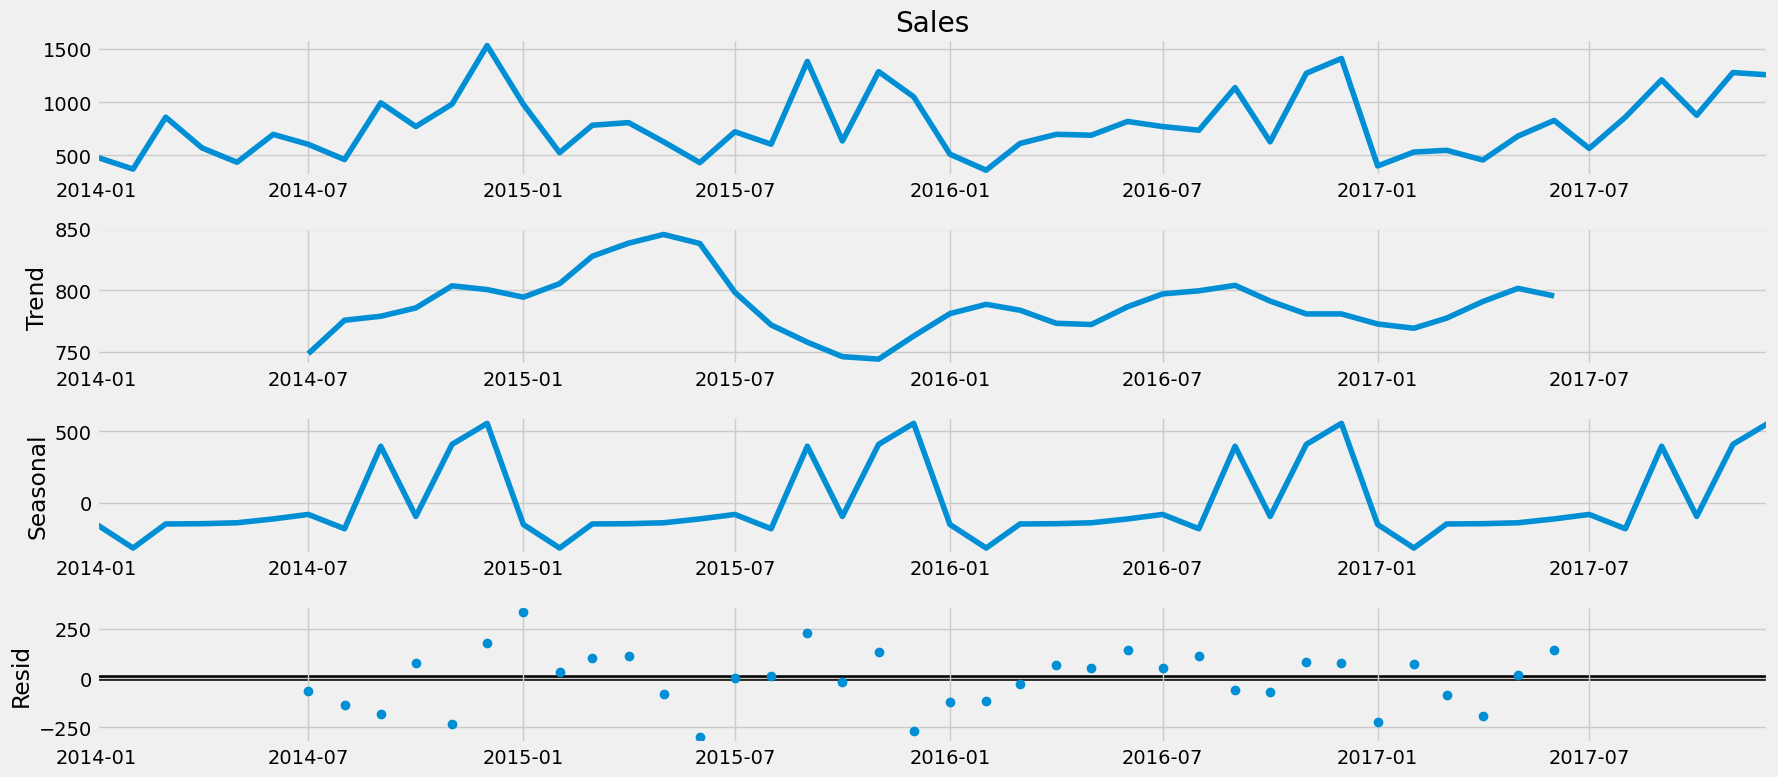

In [4]:
#start date: 24/01/2024
#project_title: An End-to-End Project on Time Series Analysis and Forecasting with Python
#project_link: 

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from pylab import rcParams


#reading and viewing dataset
dataset = pd.read_excel("superstore_data.xls")
print(dataset.head())
print(dataset.info())
print(dataset.describe())
print(dataset.isnull().sum())

#starting from time series analysis and forecasting for furniture sales.
furniture = dataset.loc[dataset['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

#Data Preprocessing: removing cols we dont need and many more
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
print(furniture.isnull().sum())
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
print(furniture)

#indexing with time
furniture = furniture.set_index('Order Date')
print(furniture.index)

#using month as the timestamp
y = furniture['Sales'].resample('MS').mean()
print(y['2017':])

#Visualizing Furniture Sales Time Series Data
y.plot(figsize=(15, 6))
plt.show()

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#stop date: 30/01/2024
#end date:
